In [54]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import matplotlib.pyplot as pylab
from stimuli import Figure5
import numpy as np 
import pprint
import json

In [56]:
def check_distribution(label, ang_counter, total_counter):
    
    # we dont care until we reach larger amounts
    if total_counter < 1000:
        return True
        
    num_angles = 4
    
    # not adding anything over 110% of the average amount in each angle bucket
    threshold = (total_counter / len(ang_counter) * num_angles) * 1.1
    
    for angle in label:
        if ang_counter[angle - 1] > threshold:
            return False
    
    return True

In [57]:
folder = "output/"

all_counter   = 0
train_target  = 80000
val_target    = 20000
test_target   = 20000

MAX_ANGLE = 90
HEIGHT    = 100
WIDTH     = 150

train_data = np.zeros((train_target, 100, 150), dtype=np.float32)
train_label = np.zeros((train_target, 4), dtype=np.float32)
train_counter = 0

val_data = np.zeros((val_target, 100, 150), dtype=np.float32)
val_label = np.zeros((val_target, 4), dtype=np.float32)
val_counter = 0

test_data = np.zeros((test_target, 100, 150), dtype=np.float32)
test_label = np.zeros((test_target, 4), dtype=np.float32)
test_counter = 0

train_angles = np.zeros(MAX_ANGLE)
val_angles   = np.zeros(MAX_ANGLE)
test_angles  = np.zeros(MAX_ANGLE)

used = set()

iteration_counter = 0

while train_counter < train_target or val_counter < val_target or test_counter < test_target:
    
    iteration_counter += 1
    if not iteration_counter % 100000:
        print(iteration_counter)

    sparse, image, label, parameters = Figure5.angle(flags=[True, False, False])

    np_image = image.astype(np.float32)
    
    # adding noise
    np_image += np.random.uniform(0, 0.05, (HEIGHT, WIDTH))
    
    sorted_label = tuple(np.sort(label))
    
    if sorted_label not in used:
                                                                               
        if train_counter < train_target and check_distribution(label, train_angles, train_counter):
            
            for angle in label: 
                train_angles[angle - 1] += 1

            train_data[train_counter] = np_image
            train_label[train_counter] = label
            
            pylab.imsave(folder + "train/" + str(train_counter) + ".png", image)
            
            used.add(sorted_label)
            train_counter += 1
            all_counter += 1

        #repeat process with other 2 sets of data
        elif val_counter < val_target and check_distribution(label, val_angles, val_counter):
            
            for angle in label: 
                val_angles[angle - 1] += 1

            val_data[val_counter] = np_image
            val_label[val_counter] = label
            
            pylab.imsave(folder + "val/" + str(val_counter) + ".png", image)
            
            used.add(sorted_label)
            val_counter += 1
            all_counter += 1

        elif test_counter < test_target and check_distribution(label, test_angles, test_counter):
            
            for angle in label: 
                test_angles[angle - 1] += 1

            test_data[test_counter] = np_image
            test_label[test_counter] = label
            
            pylab.imsave(folder + "test/" + str(test_counter) + ".png", image)
            
            used.add(sorted_label)
            test_counter += 1
            all_counter += 1
        
np.save(folder + "train_data.npy",  train_data)
np.save(folder + "train_label.npy", train_label)
np.save(folder + "val_data.npy",    val_data)
np.save(folder + "val_label.npy",   val_label)
np.save(folder + "test_data.npy",   test_data)
np.save(folder + "test_label.npy",  test_label)

100000


<BarContainer object of 90 artists>

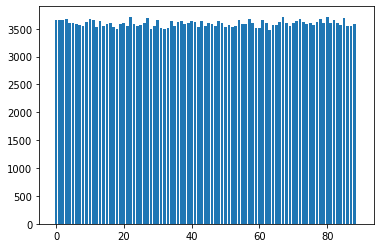

In [65]:
pyplot.bar(range(90),train_angles)


<BarContainer object of 90 artists>

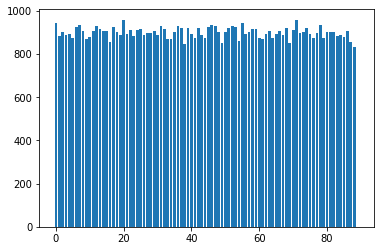

In [66]:
pyplot.bar(range(90), val_angles)

<BarContainer object of 90 artists>

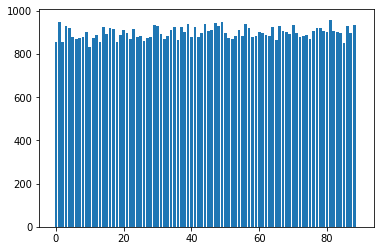

In [68]:
pyplot.bar(range(90), test_angles)